In [1]:
import nest_asyncio
import PyUber
import warnings
import time
import asyncio
import pandas as pd
from datetime import datetime
nest_asyncio.apply() #### To allow async Pyuber code execution inside a jupyter nb
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy connectable")

In [2]:
import subprocess
import sys
import importlib.util
import platform

In [3]:
def uninstall(package):
    """Uninstall a specified package."""
    print(f"Attempting to uninstall {package}...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', package])
    print(f"Uninstallation of {package} complete.")

def install(package):
    """Install a package. Open a new terminal window on Windows to display progress."""
    print(f"Installing {package}...")
    subprocess.run([sys.executable, "-m", "pip", "install", package], check=True)
    print(f"Installation of {package} complete.")

In [4]:
# Informative print statement before checking Python dependencies
print("Checking Python dependencies for LAK Lot Dispo OneClick...")

Checking Python dependencies for LAK Lot Dispo OneClick...


In [5]:
# List of required packages
packages = [
    'pandas',
    'PyUber',
    'pytz',
    'matplotlib',
    'numpy'
]

In [6]:
# Check and install missing packages
for package in packages:
    if importlib.util.find_spec(package) is None:
        print(f"{package} is not installed. Installing now...")
        install(package)
    else:
        print(f"{package} is already installed.")


pandas is already installed.
PyUber is already installed.
pytz is already installed.
matplotlib is already installed.
numpy is already installed.


In [7]:
# List of packages to import for step indicator
import_modules = [
    'datetime', 'timedelta', 'pandas', 'PyUber', 'pytz', 'urllib.parse', 
    'webbrowser', 'json', 'matplotlib.pyplot', 'numpy', 
    'matplotlib.dates', 'tkinter', 'ttk', 'io.BytesIO', 'base64', 'tempfile', 'os'
]

In [8]:
imported_count = 0
total_imports = len(import_modules)

try:
    print("Importing Packages")
    
    from datetime import datetime, timedelta 
    imported_count += 1
    print(f"Imported datetime, timedelta({imported_count}/{total_imports})")
    
    import pandas as pd 
    imported_count += 1
    print(f"Imported pandas ({imported_count}/{total_imports})")
    
    import PyUber 
    imported_count += 1
    print(f"Imported PyUber ({imported_count}/{total_imports})")
    
    import pytz
    imported_count += 1
    print(f"Imported pytz ({imported_count}/{total_imports})")
    
    import urllib.parse 
    imported_count += 1 
    print(f"Imported urllib.parse ({imported_count}/{total_imports})")
    
    import webbrowser 
    imported_count += 1
    print(f"Imported webbrowser ({imported_count}/{total_imports})")
    
    import json 
    imported_count += 1
    print(f"Imported json ({imported_count}/{total_imports})")
    
    import matplotlib.pyplot as plt 
    imported_count += 1
    print(f"Imported matplotlib.pyplot ({imported_count}/{total_imports})")
    
    import numpy as np 
    imported_count += 1
    print(f"Imported numpy ({imported_count}/{total_imports})")
    
    from matplotlib.dates import DateFormatter, date2num, num2date
    imported_count += 1
    print(f"Imported DateFormatter, date2num, num2date ({imported_count}/{total_imports})")
    
    import tkinter as tk 
    imported_count += 1
    print(f"Imported tkinter ({imported_count}/{total_imports})")
    
    from tkinter import ttk 
    imported_count += 1
    print(f"Imported ttk ({imported_count}/{total_imports})")
    
    from io import BytesIO 
    imported_count += 1
    print(f"Imported io.BytesIO ({imported_count}/{total_imports})")
    
    import base64
    imported_count += 1
    print(f"Imported base64 ({imported_count}/{total_imports})")
    
    import tempfile 
    imported_count += 1
    print(f"Imported tempfile ({imported_count}/{total_imports})")
    
    import os 
    imported_count += 1
    print(f"Imported os ({imported_count}/{total_imports})")
    
    print("All imports successful")
    
except ImportError as e:
    print(f"Import error at step {imported_count + 1}/{total_imports}: {e}")

Importing Packages
Imported datetime, timedelta(1/17)
Imported pandas (2/17)
Imported PyUber (3/17)
Imported pytz (4/17)
Imported urllib.parse (5/17)
Imported webbrowser (6/17)
Imported json (7/17)
Imported matplotlib.pyplot (8/17)
Imported numpy (9/17)
Imported DateFormatter, date2num, num2date (10/17)
Imported tkinter (11/17)
Imported ttk (12/17)
Imported io.BytesIO (13/17)
Imported base64 (14/17)
Imported tempfile (15/17)
Imported os (16/17)
All imports successful


In [9]:
sites = ['D1D']
ds = [f'{site}_PROD_XEUS' for site in sites]

In [10]:
####################
###################
###################



def sql_waferChamberHistory(operation, lot):
    """ 
    Construct the updated SQL query with given operation and lot
    """ 
    
    return f""" 
    SELECT 'D1D' "SITE"
      ,h.RUNKEY
      ,h.BATCH_ID
      ,h.LOTOPERKEY
      ,h.LOT
      ,h.OPERATION
      ,h.ROUTE
      ,c.WAFER "WAFER_ID"
      ---,c.SLOT
      ,CAST(c.SLOT AS INTEGER) "SLOT"
      ,c.START_TIME
      ,c.END_TIME
      ,c.STATE
      ,c.ENTITY
      ,c.CHAMBER
      ,c.ENTITY_CHAMBER
      ,c.SUBENTITY
      ,c.SUB_OPERATION
      ,c.CHAMBER_SEQUENCE
      ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
      ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
      ,c.IN_SUITCASE_FLAG
      ,lr.RECIPE "LOT_RECIPE"
      ,wr.RECIPE "WAFER_RECIPE"
      ,cr.RECIPE "CHAMBER_RECIPE"
      ,a.ATTRIBUTE_STRING "ATTRIBUTES"
      ,h.PRODUCT
      ,h.LAST_TXN_TIME
    FROM F_LOTENTITYHIST h
    INNER JOIN F_WAFERENTITYHIST w
      ON w.RUNKEY=h.RUNKEY
      AND w.ENTITY=h.ENTITY
    INNER JOIN F_WAFERCHAMBERHIST c
      ON c.RUNKEY=h.RUNKEY
      AND c.ENTITY=h.ENTITY
      AND c.WAFER=w.WAFER
    INNER JOIN F_LOT_WAFER_RECIPE wr
      ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
    INNER JOIN F_LOT_WAFER_RECIPE lr
      ON lr.RECIPE_ID=h.LOT_RECIPE_ID
    INNER JOIN F_LOT_WAFER_RECIPE cr
      ON cr.RECIPE_ID=c.WAFER_CHAMBER_RECIPE_ID
    INNER JOIN F_LOT_WAFER_ATTRIBUTE a
      ON a.ATTRIBUTE_ID=c.ATTRIBUTE_ID
    WHERE h.ENTITY IN (SELECT ENTITY FROM F_ENTITY WHERE (ENTITY LIKE 'BSP%' ESCAPE '\\'))
      AND h.LAST_TXN_TIME>=TRUNC(CURRENT_DATE)-60
      AND h.OPERATION IN ('{operation}')
      AND h.LOT='{lot}'

    """ 

In [11]:
############################################
###########################################        

def run_sql(sql=None, datasource='ds'):
    """
    Connect to a database with a connection and run a query. Return data as a dataframe.
    """
    try:
        cxn = PyUber.connect(datasource)
        result = cxn.execute(sql)
        rows = result.fetchall()
        column_names = [x[0] for x in result.description]
        df = pd.DataFrame(rows, columns=column_names)
        return df
    except Exception as e:
        print(datetime.now(), '|', 'ERROR. Could not execute query:', e)
    finally:
        cxn.close()

In [12]:
########################################
#######################################
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.getvalue()).decode('utf-8')

In [13]:
################################################
###############################################
def display_html_in_browser(html_content):
    file_path = os.path.expanduser("~/test_page.html")
    
    with open(file_path, "w") as f:
        f.write(html_content)
    
    webbrowser.open("file://" + file_path)

In [14]:
##############################
##############################

def export_to_html(df, plot_img_base64):
    html_table = df.to_html(classes='table', index=False, border=0)
    html_content = f'''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>Wafer History Table</title>
        <style>
            /* Your CSS styles here */
        </style>
    </head>
    <body>
        <h2 style="text-align: center;">Wafer History</h2>
        {html_table}
        <div style="text-align: center;">
            <img src="data:image/png;base64,{plot_img_base64}" alt="Wafer History Plot"/>
        </div>
    </body>
    </html>
    '''
    display_html_in_browser(html_content)

In [15]:
lot = "D5038270"
operation = "260536"

updated_query = sql_waferChamberHistory(operation, lot)
print(updated_query)

 
    SELECT 'D1D' "SITE"
      ,h.RUNKEY
      ,h.BATCH_ID
      ,h.LOTOPERKEY
      ,h.LOT
      ,h.OPERATION
      ,h.ROUTE
      ,c.WAFER "WAFER_ID"
      ---,c.SLOT
      ,CAST(c.SLOT AS INTEGER) "SLOT"
      ,c.START_TIME
      ,c.END_TIME
      ,c.STATE
      ,c.ENTITY
      ,c.CHAMBER
      ,c.ENTITY_CHAMBER
      ,c.SUBENTITY
      ,c.SUB_OPERATION
      ,c.CHAMBER_SEQUENCE
      ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
      ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
      ,c.IN_SUITCASE_FLAG
      ,lr.RECIPE "LOT_RECIPE"
      ,wr.RECIPE "WAFER_RECIPE"
      ,cr.RECIPE "CHAMBER_RECIPE"
      ,a.ATTRIBUTE_STRING "ATTRIBUTES"
      ,h.PRODUCT
      ,h.LAST_TXN_TIME
    FROM F_LOTENTITYHIST h
    INNER JOIN F_WAFERENTITYHIST w
      ON w.RUNKEY=h.RUNKEY
      AND w.ENTITY=h.ENTITY
    INNER JOIN F_WAFERCHAMBERHIST c
      ON c.RUNKEY=h.RUNKEY
      AND c.ENTITY=h.ENTITY
      AND c.WAFER=w.WAFER
    INNER JOIN F_LOT_WAFER_RECIPE wr
      ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
    IN

In [16]:
waferChamberHistory = run_sql(updated_query, ds)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
# waferChamberHistory.head()

In [17]:
waferChamberHistory.SLOT.max()

24

In [18]:
waferChamberHistory[waferChamberHistory.SLOT == waferChamberHistory.SLOT.max()].sort_values(by='START_TIME', ascending=True).reset_index(drop=True).shape

(13, 27)

In [19]:
slots = pd.Series(waferChamberHistory.SLOT.sort_values().unique())
slots[0]

2

In [20]:
waferChamberHistory['START_TIME'] = pd.to_datetime(waferChamberHistory['START_TIME'], errors='coerce')
waferChamberHistory['END_TIME'] = pd.to_datetime(waferChamberHistory['END_TIME'], errors='coerce')

In [21]:
waferChamberHistory[waferChamberHistory.SLOT == slots[0]].sort_values(by='START_TIME', ascending=True).reset_index(drop=True)

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
0,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:11.463,2025-04-02 09:07:30.314,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,17.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
1,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:30.347,2025-04-02 09:12:14.797,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,12.0,4.74,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
2,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:12:14.823,2025-04-02 09:17:23.220,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,12.0,5.14,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
3,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:17:23.257,2025-04-02 09:20:49.529,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,12.0,3.44,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
4,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:49.558,2025-04-02 09:26:06.635,Completed,BSP07,Z1,BSP07_Z1,None,Process-1,5.0,12.0,5.28,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
5,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:51.326,2025-04-02 09:28:45.331,Completed,BSP07,CT-D,BSP07_CT-D,None,Process-2,6.0,5.0,7.90,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
6,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:26:06.666,2025-04-02 09:31:37.988,Completed,BSP07,Z2,BSP07_Z2,None,Process-3,7.0,12.0,5.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
7,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:31:38.014,2025-04-02 09:33:34.430,Completed,BSP07,Z3,BSP07_Z3,None,Process-5,9.0,12.0,1.94,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:33:34.455,2025-04-02 09:34:00.104,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,12.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:34:00.129,2025-04-02 09:35:32.417,Completed,BSP07,T-ARM2,BSP07_T-ARM2,None,Robot-3,11.0,12.0,1.54,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [22]:
waferChamberHistory[waferChamberHistory.SLOT == slots[0]].sort_values(by='END_TIME', ascending=True).reset_index(drop=True)

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
0,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:11.463,2025-04-02 09:07:30.314,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,17.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
1,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:30.347,2025-04-02 09:12:14.797,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,12.0,4.74,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
2,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:12:14.823,2025-04-02 09:17:23.220,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,12.0,5.14,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
3,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:17:23.257,2025-04-02 09:20:49.529,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,12.0,3.44,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
4,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:49.558,2025-04-02 09:26:06.635,Completed,BSP07,Z1,BSP07_Z1,None,Process-1,5.0,12.0,5.28,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
5,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:51.326,2025-04-02 09:28:45.331,Completed,BSP07,CT-D,BSP07_CT-D,None,Process-2,6.0,5.0,7.90,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
6,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,NaT,2025-04-02 09:31:22.962,Completed,BSP07,CT-D,BSP07_CT-D,None,Process-4,8.0,6.0,NaN,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
7,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:26:06.666,2025-04-02 09:31:37.988,Completed,BSP07,Z2,BSP07_Z2,None,Process-3,7.0,12.0,5.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:31:38.014,2025-04-02 09:33:34.430,Completed,BSP07,Z3,BSP07_Z3,None,Process-5,9.0,12.0,1.94,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:33:34.455,2025-04-02 09:34:00.104,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,12.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [23]:
#Drop observations with missing values if any. 
waferChamberHistory.dropna(subset=['START_TIME', 'END_TIME'], inplace=True)

# Sort data by START_TIME. Definitely need to sort the data by start_time
waferChamberHistory.sort_values(by='START_TIME', inplace=True)

In [24]:
unique_entities = waferChamberHistory.ENTITY.unique()

In [25]:
waferChamberHistory

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
108,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:21:42.092,2025-04-02 08:22:00.687,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,1.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
107,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:22:00.733,2025-04-02 08:23:14.406,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,1.0,1.23,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
111,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:23:14.432,2025-04-02 08:23:51.791,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,1.0,0.62,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
95,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A10FZ248SLG2,23,2025-04-02 08:23:47.414,2025-04-02 08:24:05.872,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,2.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
106,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:23:51.824,2025-04-02 08:24:13.953,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,1.0,0.37,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:33:34.455,2025-04-02 09:34:00.104,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,12.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:34:00.129,2025-04-02 09:35:32.417,Completed,BSP07,T-ARM2,BSP07_T-ARM2,None,Robot-3,11.0,12.0,1.54,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
135,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:35:04.037,2025-04-02 09:35:31.013,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-4,13.0,23.0,0.45,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
6,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:35:32.442,2025-04-02 09:37:14.999,Completed,BSP07,SPINNER TABLE,BSP07_SPINNER TABLE,None,Clean-1,12.0,12.0,1.71,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [26]:
BSP_chambers = ['ROBOT', 'POSITION TABLE', 'T-ARM1', 'FRONT CHUCK TABLE',
                'Z1', 'Z2', 'Z3', 'WAFER WASH', 'T-ARM2', 'SPINNER TABLE']

bsp_colors = plt.cm.rainbow(np.linspace(0, 1, len(BSP_chambers)))
bsp_color_map=dict(zip(BSP_chambers, bsp_colors))

In [27]:
def BSP_CT_handling(df):
    """ 
    This function add a new column called CHUCK_TABLE that represents which C/T this wafer is processed in.
    It would then filter out the C/T info from the CHAMBER column.    
    """
    mask = df['CHAMBER'].str.contains(r'^CT-.+', na=False)
    if mask.any(): #Checking if any of the row returns True
        value = df.loc[mask, 'CHAMBER'].iloc[0]
        df['CHUCK_TABLE'] = value
        
    df = df[df['CHAMBER'] != value]
    return df

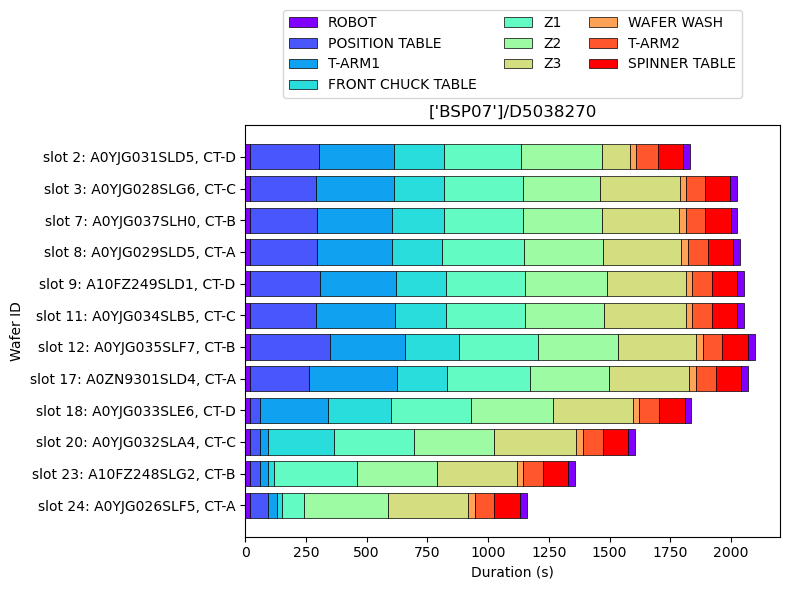

In [29]:
#Sort wafer IDs by their SLOT in descending order so that the wafer with the smallest slot (first wafer) is plotted last
unique_wafers_df = waferChamberHistory[['WAFER_ID', 'SLOT']].drop_duplicates().sort_values('SLOT', ascending=False)
plt.figure(figsize=(8,6))
for wafer in unique_wafers_df['WAFER_ID']:
    #Focus only on a a single wafer. Sort by start_time in ascending order to obtain the correct sequence of chamber
    DF = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer].sort_values(by='START_TIME', ascending=True)
    
    DF = BSP_CT_handling(DF)
    
    #resetting the index to allow index slicing
    DF = DF.reset_index(drop=True)
    
    
    base_time = DF.START_TIME[0]
    y_label = f"slot {DF.SLOT[0]}: {wafer}, {DF.CHUCK_TABLE.unique()[0]}"
    
    for I in range(len(DF)):
        start_time = DF.START_TIME[I]
        end_time = DF.END_TIME[I]
        chamber = DF.CHAMBER[I]
        start_sec = (start_time - base_time).total_seconds()
        duration = (end_time - start_time).total_seconds()
        
        plt.barh(y_label, duration, left=start_sec,
                 color=bsp_color_map[chamber], edgecolor='k', linewidth=0.5,
                 label=chamber)
        plt.legend(BSP_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)
        plt.title(f"{unique_entities}/{lot}")
        plt.xlabel('Duration (s)')
        plt.ylabel('Wafer ID')
        plt.tight_layout()